In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Final_Data.csv')
df.head(5)

,Unnamed: 0,Flat no,Wing,Owner Name,Owner's Spouse Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation
0,0,101,A,Omkar,-,4,4,Maharashtra,500,2,Owner,6000,Yes,Owned,2500.0
1,1,102,A,Bhavana,-,5,6,Bangalore,500,2,Owner,6000,Yes,Owned,10000.0
2,2,103,A,Govind,-,5,3,Rajasthan,500,2,Owner,6000,Yes,Owned,1500.0
3,3,201,A,Reena,-,4,2,Madhya Pradesh,550,2,Tenant,6000,No,Owned,NaN
4,4,202,A,Karishma,-,7,15,Gujurat,600,3,Owner,7000,No,Owned,2500.0


In [ ]:
df.dtypes
df.drop(['Unnamed: 0','Owner\'s Spouse Name'], axis=1, inplace=True)

In [ ]:
df.dtypes

Flat no                     int64
Wing                       object
Owner Name                 object
No of Resident             object
Confirmed Members          object
Origin of Owner            object
Flat Area (sq.mt)           int64
No of Room                  int64
Tenant or owner            object
Maintenance Amt            object
Availlability of owner     object
Flat Vacancy               object
Donation                  float64
dtype: object

In [ ]:
df.columns

Index(['Flat no', 'Wing', 'Owner Name', 'No of Resident', 'Confirmed Members',
       'Origin of Owner', 'Flat Area (sq.mt)', 'No of Room', 'Tenant or owner',
       'Maintenance Amt', 'Availlability of owner', 'Flat Vacancy',
       'Donation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          60 non-null     object 
 4   Confirmed Members       60 non-null     object 
 5   Origin of Owner         60 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         32 non-null     object 
 10  Availlability of owner  60 non-null     object 
 11  Flat Vacancy            43 non-null     object 
 12  Donation                55 non-null     float64
dtypes: float64(1), int64(3), object(9)
memory usage: 6.2+ KB


In [ ]:
df['No of Resident'] = pd.to_numeric(df['No of Resident'], errors='coerce') # Convert to numeric, converting errors to NaN
df['Confirmed Members'] = pd.to_numeric(df['Confirmed Members'], errors='coerce')
df['Maintenance Amt'] = pd.to_numeric(df['Maintenance Amt'], errors='coerce')
df.dtypes


Flat no                     int64
Wing                       object
Owner Name                 object
No of Resident            float64
Confirmed Members         float64
Origin of Owner            object
Flat Area (sq.mt)           int64
No of Room                  int64
Tenant or owner            object
Maintenance Amt           float64
Availlability of owner     object
Flat Vacancy               object
Donation                  float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          56 non-null     float64
 4   Confirmed Members       56 non-null     float64
 5   Origin of Owner         60 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         31 non-null     float64
 10  Availlability of owner  60 non-null     object 
 11  Flat Vacancy            43 non-null     object 
 12  Donation                55 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


In [ ]:
df.replace('-',np.nan, inplace=True)

In [ ]:
df['Maintenance Amt'].unique()

array([6000., 7000., 5500.,   nan])

In [ ]:
df['Flat Area (sq.mt)'].unique()

array([500, 550, 600])

In [ ]:
df['Maintenance Amt'].value_counts()

7000.0    25
6000.0     5
5500.0     1
Name: Maintenance Amt, dtype: int64

In [ ]:
df['Flat Area (sq.mt)'].value_counts()

600    25
500    20
550    15
Name: Flat Area (sq.mt), dtype: int64

In [ ]:
avg = df.groupby('Flat Area (sq.mt)')['Maintenance Amt'].mean()

In [ ]:
df['Maintenance Amt'] = df['Maintenance Amt'].fillna(df['Flat Area (sq.mt)'].map(avg))

In [ ]:
df['Maintenance Amt'].value_counts()

7000.0    25
6000.0    18
5875.0    16
5500.0     1
Name: Maintenance Amt, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          56 non-null     float64
 4   Confirmed Members       56 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         60 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            42 non-null     object 
 12  Donation                55 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


In [ ]:
result = df.groupby(['Tenant or owner', 'Availlability of owner']).size().reset_index(name='count')
result

,Tenant or owner,Availlability of owner,count
0,Owner,No,9
1,Owner,Yes,9
2,Tenant,No,6
3,Tenant,Yes,4
4,owner,No,7
5,owner,Yes,10
6,tenant,No,8
7,tenant,Yes,6


In [ ]:
#  For missing values in the 'Donation', ‘No of Resident' , 'Confirmed Members' column, we impute them with the
#  median value of the respective column.
df['No of Resident'] = df['No of Resident'].fillna(df['No of Resident'].median())

df['Confirmed Members'] = df['Confirmed Members'].fillna(df['Confirmed Members'].median())

df['Donation'] = df['Donation'].fillna(df['Donation'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          60 non-null     float64
 4   Confirmed Members       60 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         60 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            42 non-null     object 
 12  Donation                60 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


In [ ]:
# Finally, we handle missing values in the 'Availability of owner' and 'Origin of Owner' columns by imputing them with
# the mode (most frequent value) of their respective columns.

# df['Availlability of owner'].value_counts()
# mode_Availability = df['Availlability of owner'].mode()[0]
# df['Availlability of owner'] = df['Availlability of owner'].fillna(mode_Availability)

# df['Origin of Owner'].value_counts()
# mode_origin = df['Origin of Owner'].mode()[0]
# df['Origin of Owner'] = df['Origin of Owner'].fillna(mode_origin)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          60 non-null     float64
 4   Confirmed Members       60 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         60 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            42 non-null     object 
 12  Donation                60 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


In [ ]:
# df['Flat Vacancy']
df['Flat Vacancy']=df['Flat Vacancy'].fillna(df.apply(lambda x : 'Owned' if x['Availlability of owner'] == 'Yes'
                                                      else 'Vacant',axis=1))
# df['Flat Vacancy']

#df['Flat Vacancy'].fillna(df.apply(lambda x:'Owned' if x['Availlability of owner'] =='Yes' else 'Vacant',axis = 1 ),inplace = True)

df['Flat Vacancy'].value_counts()


Owned     31
Vacant    29
Name: Flat Vacancy, dtype: int64

In [ ]:
df['Flat Vacancy'].unique()

array(['Owned', 'Vacant'], dtype=object)

In [ ]:
df['Availlability of owner'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
df.columns

Index(['Flat no', 'Wing', 'Owner Name', 'No of Resident', 'Confirmed Members',
       'Origin of Owner', 'Flat Area (sq.mt)', 'No of Room', 'Tenant or owner',
       'Maintenance Amt', 'Availlability of owner', 'Flat Vacancy',
       'Donation'],
      dtype='object')

In [ ]:
# Calculate the difference between the "Confirmed Members" and "No of Resident" columns and
# store the result in a new column called "Outsiders."

df['Outsiders'] = df['Confirmed Members']-df['No of Resident']
df['Outsiders'].unique()


# 2. Set Values in "Outsiders" Column:

# In this step, you update the values in the "Outsiders" column. If the calculated difference is greater than zero
# (indicating that there are more confirmed members than residents), you set the value to x, indicating the number of
# outsiders.

# If the difference is less than or equal to zero (indicating that there are no more confirmed members than residents),
# you set the value to 0, indicating that the person is a resident.

df['Outsiders'] = df['Outsiders'].apply(lambda x: x if x>0 else 0)
df['Outsiders'].unique()

array([ 0.,  1.,  8., 13.,  6.,  4.,  2.,  3.])

In [ ]:
# 3. Standardize Columns:

# You convert the values in the  'Origin of Owner', 'Tenant or owner', 'Availability of owner' and 'Flat Vacancy'
# columns to lowercase to ensure uniform formatting.

# Lastly, you standardize the 'Owner Name' column by converting it to title case to make names consistent and readable.

df.columns

Index(['Flat no', 'Wing', 'Owner Name', 'No of Resident', 'Confirmed Members',
       'Origin of Owner', 'Flat Area (sq.mt)', 'No of Room', 'Tenant or owner',
       'Maintenance Amt', 'Availlability of owner', 'Flat Vacancy', 'Donation',
       'Outsiders'],
      dtype='object')

In [ ]:
df['Origin of Owner'] = df['Origin of Owner'].str.lower()
df['Tenant or owner'] = df['Tenant or owner'].str.lower()
df['Availlability of owner'] = df['Availlability of owner'].str.lower()
df['Flat Vacancy'] = df['Flat Vacancy'].str.lower()
df['Owner Name'] = df['Owner Name'].str.title()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          60 non-null     float64
 4   Confirmed Members       60 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         60 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            60 non-null     object 
 12  Donation                60 non-null     float64
 13  Outsiders               60 non-null     float64
dtypes: float64(5), int64(3), object(6)
memory us

In [ ]:
df

,Flat no,Wing,Owner Name,No of Resident,Confirmed Members,Origin of Owner,Flat Area (sq.mt),No of Room,Tenant or owner,Maintenance Amt,Availlability of owner,Flat Vacancy,Donation,Outsiders
0,101,A,Omkar,4.0,4.0,maharashtra,500,2,owner,6000.0,yes,owned,2500.0,0.0
1,102,A,Bhavana,5.0,6.0,bangalore,500,2,owner,6000.0,yes,owned,10000.0,1.0
2,103,A,Govind,5.0,3.0,rajasthan,500,2,owner,6000.0,yes,owned,1500.0,0.0
3,201,A,Reena,4.0,2.0,madhya pradesh,550,2,tenant,6000.0,no,owned,2500.0,0.0
4,202,A,Karishma,7.0,15.0,gujurat,600,3,owner,7000.0,no,owned,2500.0,8.0
5,203,A,Ragesh,4.0,4.0,kerala,500,2,tenant,5500.0,no,owned,5000.0,0.0
6,301,A,Harshad,8.0,8.0,gujurat,550,2,owner,6000.0,yes,owned,5000.0,0.0
7,302,A,Abdul,4.0,4.0,maharashtra,600,3,owner,7000.0,yes,vacant,2500.0,0.0
8,303,A,Lohit,5.0,2.0,bangalore,500,2,owner,5875.0,NaN,vacant,1000.0,0.0
9,401,A,Vijay,5.0,3.0,rajasthan,550,2,tenant,6000.0,no,vacant,10000.0,0.0


In [ ]:
# df['Tenant or owner'].replace('Owner','owner',inplace = True)
# df['Tenant or owner'].replace('Tenant','tenant',inplace = True)

## Demographic Overview:

In [ ]:
# Calculate the average number of residents per flat.
# df.columns
# round = round(df.groupby('Wing')['No of Resident'].mean().reset_index(name="avg"), 2)
# print(round)

# Avoid using the variable name 'round' to prevent conflicts with the built-in round() function
rounded_mean = df.groupby('Wing')['No of Resident'].mean().reset_index(name="avg").round(2)
print(rounded_mean)


  Wing   avg
0    A  4.57
1    B  3.60


In [ ]:
df['No of Resident'].mean()

4.083333333333333

In [ ]:
# mean_value = round(df['No of Resident'].mean(), 2)
# print(mean_value)
df['No of Resident'].mean().round(2)

4.08

In [ ]:
# Determine the distribution of residents by their place of origin.

df.columns

# total_r = df.groupby('Origin of Owner')['No of Resident'].sum().sort_values(ascending=False)
# print(total_r)
total_r = df.groupby('Origin of Owner')['No of Resident'].sum().sort_values(ascending=False).astype(int)
print(total_r)


Origin of Owner
maharashtra       55
kerala            24
gujarat           18
rajasthan         18
haryana           16
madhya pradesh    16
gujurat           15
karnataka         14
tamil nadu        13
punjab            11
bangalore         10
uttar pradesh     10
delhi              9
assam              6
andhra pradesh     5
kashmir            1
Name: No of Resident, dtype: int64


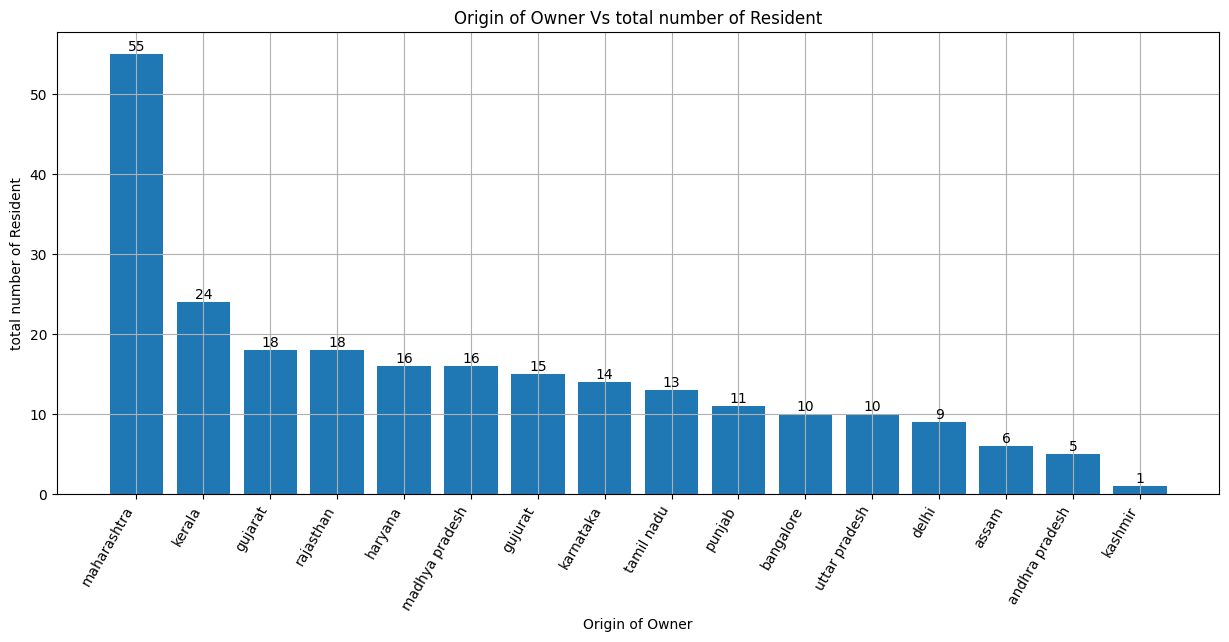

In [ ]:
# Visualize the distribution of residents by origin using a bar plot.
plt.figure(figsize=(15,6))
plt.bar(x=total_r.index, height=total_r.values)
plt.title("Origin of Owner Vs total number of Resident")
plt.xlabel("Origin of Owner")
plt.ylabel("total number of Resident")
plt.grid(True)
plt.xticks(rotation = 60, ha="right")
for i , value in enumerate (total_r.values):
  plt.text(i,value,str(value),ha="center",va="bottom")
plt.show()

## Flat Information:

In [ ]:
# Calculate the average flat area (in square meters).
df.columns
df['Flat Area (sq.mt)'].mean().round(2)

554.17

In [ ]:
# Find the most common number of rooms in flats.
df['No of Room'].value_counts().sort_values(ascending=False)

2    35
3    25
Name: No of Room, dtype: int64

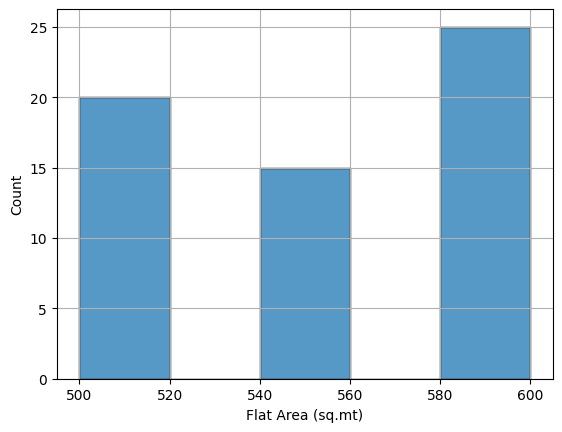

In [ ]:
# Visualize the distribution of flat areas using a histogram.
# df.columns
# plt.figure(figsize=(15,6))
sns.histplot(data=df,x='Flat Area (sq.mt)',bins=range(500,601,20))
plt.grid(True)
plt.show()

## Owner and Tenant Information:

In [ ]:
# Calculate the percentage of flat owners and tenants in the housing society.
df.columns

Index(['Flat no', 'Wing', 'Owner Name', 'No of Resident', 'Confirmed Members',
       'Origin of Owner', 'Flat Area (sq.mt)', 'No of Room', 'Tenant or owner',
       'Maintenance Amt', 'Availlability of owner', 'Flat Vacancy', 'Donation',
       'Outsiders'],
      dtype='object')

In [ ]:
df['Tenant or owner'].value_counts()

owner     36
tenant    24
Name: Tenant or owner, dtype: int64

In [ ]:
tenant_owner_counts = df['Tenant or owner'].value_counts()
tenant_owner_percentages = (tenant_owner_counts / len(df)) * 100
tenant_owner_percentages

owner     60.0
tenant    40.0
Name: Tenant or owner, dtype: float64

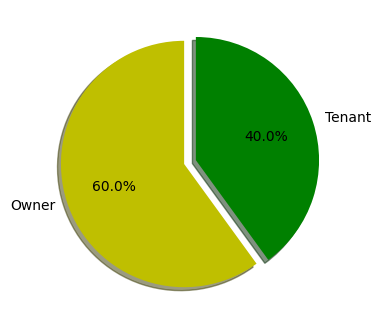

In [ ]:
# Visualize the distribution of flat ownership using a pie chart.
plt.figure(figsize=(4,4))
my_var = ['Owner','Tenant']
plt.pie(tenant_owner_counts, labels=my_var,  autopct='%1.1f%%',
        startangle=90, shadow=True, explode=[0,0.1], colors=['y','g'])
plt.show()

## Resident Participation:

In [ ]:
# Calculate the percentage of residents' participation by dividing the 'Confirmed Members'
# by the 'No of Resident' columns and multiplying by 100 to get the percentage.

df.columns

perc = ((df['Confirmed Members']/df['No of Resident'])*100).sort_values(ascending=False).round(2)
print(perc)
print("....."*10)
mean_per = perc.mean()

11    285.71
31    220.00
4     214.29
59    200.00
40    180.00
53    166.67
54    150.00
1     120.00
29    100.00
56    100.00
52    100.00
50    100.00
39    100.00
35    100.00
0     100.00
30    100.00
13    100.00
5     100.00
6     100.00
7     100.00
12    100.00
51     80.00
41     80.00
37     80.00
18     80.00
22     80.00
42     75.00
21     75.00
14     75.00
23     75.00
32     75.00
20     75.00
46     75.00
36     75.00
45     75.00
25     75.00
58     66.67
19     66.67
49     66.67
43     66.67
24     66.67
33     66.67
16     66.67
15     66.67
38     66.67
9      60.00
2      60.00
26     60.00
44     50.00
10     50.00
34     50.00
27     50.00
17     50.00
3      50.00
57     40.00
8      40.00
28     33.33
55     33.33
47      0.00
48      0.00
dtype: float64
..................................................


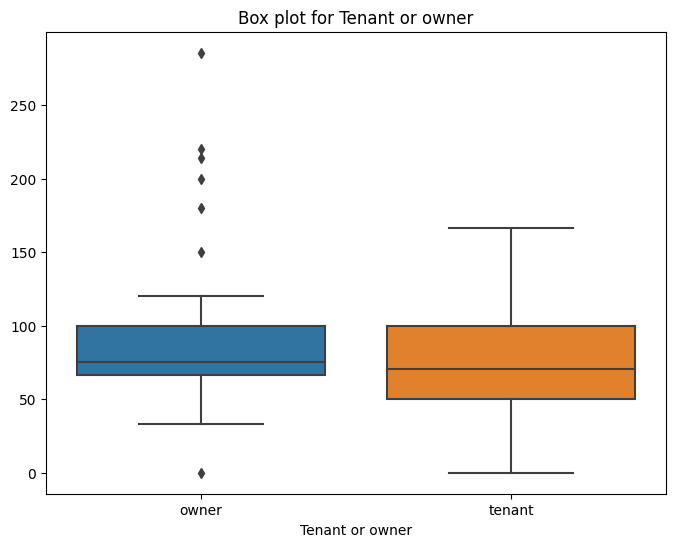

In [ ]:
# Visualize the data by creating a box plot that shows resident participation based on flat type (Owner or Tenant).
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Tenant or owner', y=perc)
plt.title('Box plot for Tenant or owner')
plt.show()

## Donations Analysis:

In [ ]:
# Calculate the average donation amount by finding the mean of the 'Donation' column.
df.columns
mean_donation = df['Donation'].mean()

In [ ]:
# Calculate the total donation amount by summing the 'Donation' column.
total_donation = df['Donation'].sum()

## **Event Planning Recommendations:**
Create a list called 'recommendations' to store our event planning suggestions based on the data analysis.

Check if the average donation amount is greater than or equal to 5000, suggesting a higher budget for the event.

We check if the mean percentage of participation is above 70%, indicating a good turnout expectation.

We check if the total donation amount collected exceeds 50000, indicating sufficient funds.

In [ ]:
recommendations = []
if mean_donation >= 5000:
  recommendations.append("higher budget for the event.")
else:
  recommendations.append("lower budget for the event.")

if mean_per >= 70.0:
  recommendations.append("indicating a good turnout expectation.")
else:
  recommendations.append("expected low turnout")

if total_donation >= 50000:
  recommendations.append("sufficient funds")
else:
  recommendations.append("Insufficient funds")

print(recommendations)

['lower budget for the event.', 'indicating a good turnout expectation.', 'sufficient funds']
